## Import Library

In [1]:
import pandas as pd
import numpy as np
import stpredict
import warnings
# warnings.filterwarnings('ignore')

## Load Data

In [2]:
data = pd.read_excel("C:/Users/sh/Desktop/term 3 ut/Thesis and Paper/R/New folder/stpredict_data.xlsx", engine="openpyxl")

# replace missing values with the mean of columns
for var in data:
    data[var] = data[var].replace(np.nan,
                                  data[var].mean())
data

,County FIPS code,State FIPS code,Day,Month,Year,Q_eff,Temp_eff,pH_eff,COD_eff,BOD_eff,...,MLSS_AT,DO_AT,MLSS_re,EC_in,T_air_avg,T_air_min,T_air_max,Rain,Wind,Humidity
0,1001,1,1,1,2014,332402.0,23.0,6.52,16.0,3.000000,...,3717.500000,1.39,6630.0,1158.56,1.0,-2.0,5.0,1.02,8.0,60.0
1,1001,1,2,1,2014,372540.0,23.0,6.58,24.0,5.000000,...,3675.000000,1.14,5580.0,1474.43,1.0,-2.0,3.0,0.00,3.0,82.0
2,1001,1,3,1,2014,392705.0,23.0,6.61,25.0,4.000000,...,3765.000000,1.10,6130.0,1363.70,2.0,-1.0,6.0,0.00,6.0,70.0
3,1001,1,4,1,2014,373491.0,23.0,6.71,41.0,5.000000,...,3707.500000,0.92,6950.0,1446.77,3.0,0.0,6.0,0.00,6.0,59.0
4,1001,1,5,1,2014,393104.0,23.0,6.69,28.0,9.000000,...,4130.000000,0.95,6840.0,1429.97,1.0,-1.0,4.0,0.00,5.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1001,1,20,11,2015,393600.0,24.0,6.97,29.0,6.786039,...,2333.750000,1.21,7650.0,2008.05,9.0,6.0,13.0,0.00,13.0,65.0
688,1001,1,21,11,2015,392664.0,25.0,7.05,75.0,6.786039,...,3643.750000,0.93,7190.0,2008.05,8.0,3.0,13.0,0.00,6.0,56.0
689,1001,1,22,11,2015,371064.0,24.0,7.00,34.0,6.786039,...,3788.750000,2.49,7190.0,2008.05,9.0,5.0,14.0,0.00,6.0,43.0
690,1001,1,23,11,2015,343800.0,24.0,6.86,38.0,6.786039,...,3773.750000,2.37,7220.0,2008.05,11.0,5.0,17.0,0.00,6.0,18.0


## Plot

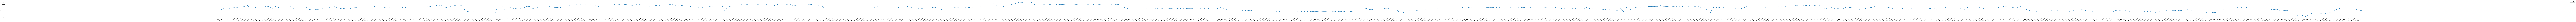

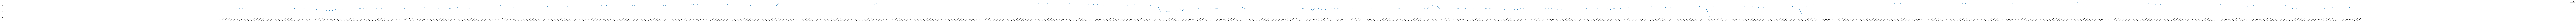

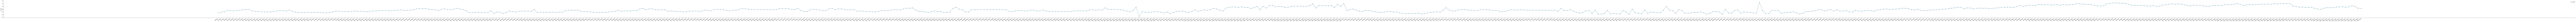

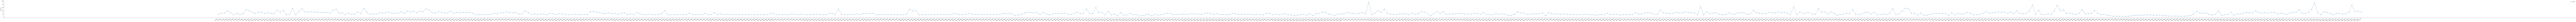

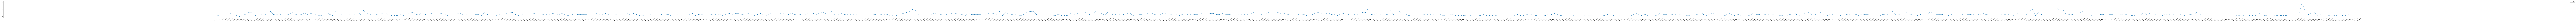

In [ ]:
from stpredict.preprocess import plot_data

plot_data(data = data,
          column_identifier = {'spatial id level 1':'County\xa0FIPS code',
                               'spatial id level 2':'State\xa0FIPS code',
                               'temporal id level 1':'Day',
                               'temporal id level 2':'Month',
                               'temporal id level 3':'Year',
                               'temporal covariates':['Q_in'],
                               'target':'Q_eff'},
          spatial_scale_table = None)

## All steps in one line
>stpredict function


In [3]:
from stpredict import stpredict

stpredict(data = data,
          column_identifier = {'spatial id level 1':'County\xa0FIPS code',
                               'spatial id level 2':'State\xa0FIPS code',
                               'temporal id level 1':'Day',
                               'temporal id level 2':'Month',
                               'temporal id level 3':'Year',
                               'temporal covariates':['Q_in',
                                                      'Temp_in',
                                                      'pH_in',
                                                      'COD_in',
                                                      'BOD_in',
                                                      'TSS_in',
                                                      'NH4_in',
                                                      'TN_in',
                                                      'PO4_in',
                                                      'TP_in',
                                                      'MLSS_AT',
                                                      'DO_AT',
                                                      'MLSS_re',
                                                      'EC_in',
                                                      'T_air_avg',
                                                      'T_air_min',
                                                      'T_air_max',
                                                      'Rain',
                                                      'Wind',
                                                      'Humidity'],
                               'target':'Q_eff'},
          forecast_horizon = 1,
          history_length = 1,
          feature_sets={'covariate': 'mRMR'},
          models=[{'gbm':{'n_estimators':200,
                          'learning_rate':0.01,
                          'min_samples_leaf':10,
                          'min_samples_split':10,
                          'max_depth':10}}],          
          model_type='regression',
          test_type='whole-as-one',
          mixed_models=[],
          performance_benchmark='R2_score',
          performance_measures=['R2_score'],
          performance_mode='normal',
          splitting_type='training-validation',
          instance_testing_size=0.2,
          instance_validation_size=0.3,
          instance_random_partitioning=False,
          fold_total_number=5,
          imputation=True,
          target_mode='normal', 
          feature_scaler='normalize',
          target_scaler='normalize',
          forced_covariates=[],
          futuristic_covariates=None,
          scenario='current',
          future_data_table=None,
          temporal_scale_level=1,
          spatial_scale_level=1,
          spatial_scale_table=None,
          aggregation_mode='mean',
          augmentation=False, 
          validation_performance_report=True, 
          testing_performance_report=True, 
          save_predictions=True, 
          save_ranked_features=True, 
          plot_predictions=True, 
          verbose=1)

# 'Q_in',
#                              'Temp_in',
#                              'pH_in',
#                              'COD_in',
#                              'BOD_in',
#                              'TSS_in',
#                              'NH4_in',
#                              'TN_in',
#                              'PO4_in',
#                              'TP_in',
#                              'MLSS_AT',
#                              'DO_AT',
#                              'MLSS_re',
#                              'EC_in',
#                              'T_air_avg',
#                              'T_air_min',
#                              'T_air_max',
#                              'Rain',
#                              'Wind',
#                              'Humidity'


{'temporal id', 'temporal id level x', 'spatial id', 'spatial id level x', 'temporal covariate x', 'spatial covariate x', 'target'},
or be specified in the column_identifier, but the names of some of the columns do not match any of the supported formats and are not mentioned in the column_identifier:
['PO4_eff', 'NH4_eff', 'TP_eff', 'pH_eff', 'TN_eff', 'TSS_eff', 'FC_eff', 'Temp_eff', 'BOD_eff', 'COD_eff']
These columns will be ignored.

---------------------------------------------
The imputation of missing values is running.
---------------------------------------------

-----------------------------------
Making historical data is running.
-----------------------------------

----------------------------------------------------------------------------------------------------
Train Validate Process

-------------------------------------------------------
Validation process is running for history length = 1.
-------------------------------------------------------



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.72it/s]


----------------------------------------------------------------------------------------------------
Train Test Process

The splitting of the data is running. The training set includes 553, and the testing set includes 138 instances.

----------------------------------------------------------------------------------------------------
Forecast Training process



100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:11<00:00,  1.72it/s]
sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x290089d23a0>


----------------------------------------------------------------------------------------------------
Predict Future Process


## Performance

In [4]:
pd.read_csv("C:/ToplearnML/performance/test process/test performance report forecast horizon = 1.csv")

,model name,history length,feature or covariate set,R2_score
0,gbm,1,"Q_in, TP_in, pH_in, T_air_max, MLSS_AT, DO_AT",0.11908


In [5]:
pd.read_csv("C:/ToplearnML/performance/validation process/training performance report forecast horizon = 1.csv")

,model name,history length,feature or covariate set,R2_score
0,gbm,1,Q_in,0.711542
1,gbm,1,"Q_in , TP_in",0.712496
2,gbm,1,"Q_in , TP_in , pH_in",0.764201
3,gbm,1,"Q_in , TP_in , pH_in , T_air_max",0.792713
4,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT",0.815979
5,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.824320
6,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.830928
7,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.841966
8,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.851180
9,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.852946


In [6]:
pd.read_csv("C:/ToplearnML/performance/validation process/validation performance report forecast horizon = 1.csv")

,model name,history length,feature or covariate set,R2_score
0,gbm,1,Q_in,0.371214
1,gbm,1,"Q_in , TP_in",0.372607
2,gbm,1,"Q_in , TP_in , pH_in",0.385397
3,gbm,1,"Q_in , TP_in , pH_in , T_air_max",0.386308
4,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT",0.412880
5,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.468269
6,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.456682
7,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.454065
8,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.419014
9,gbm,1,"Q_in , TP_in , pH_in , T_air_max , MLSS_AT , D...",0.431328


In [7]:
pd.read_csv("C:/ToplearnML/ranked features/ranked features.csv")

,rank,feature
0,1,Q_in t
1,2,TP_in t
2,3,pH_in t
3,4,T_air_max t
4,5,MLSS_AT t
5,6,DO_AT t
6,7,Wind t
7,8,COD_in t
8,9,MLSS_re t
9,10,Humidity t


In [8]:
pd.read_csv("C:/ToplearnML/prediction/future prediction/future prediction forecast horizon = 1.csv")

,spatial id,temporal id,model name,real,prediction
0,1001,2015/9/9+1,gbm,NaN,347036.73999


In [9]:
pd.read_csv("C:/ToplearnML/prediction/test process/test prediction forecast horizon = 1.csv")

,model name,spatial id,temporal id,real,prediction
0,gbm,1001,2015/5/23,426024.0,417411.285259
1,gbm,1001,2015/5/24,433800.0,409999.633042
2,gbm,1001,2015/5/25,433488.0,412505.255286
3,gbm,1001,2015/5/26,438624.0,408270.787543
4,gbm,1001,2015/5/27,443376.0,413871.610993
...,...,...,...,...,...
133,gbm,1001,2015/9/5,324672.0,324416.044673
134,gbm,1001,2015/9/6,344712.0,332375.320156
135,gbm,1001,2015/9/7,344400.0,335144.219297
136,gbm,1001,2015/9/8,333336.0,330582.053365


In [10]:
pd.read_csv("C:/ToplearnML/prediction/validation process/training prediction forecast horizon = 1.csv")

,model name,spatial id,temporal id,real,prediction
0,gbm,1001,2014/1/10,433493.0,408000.687330
1,gbm,1001,2014/1/11,389764.0,408412.426736
2,gbm,1001,2014/1/12,391312.0,399523.709016
3,gbm,1001,2014/1/13,402455.0,399255.106520
4,gbm,1001,2014/1/14,406135.0,398962.668556
...,...,...,...,...,...
382,gbm,1001,2015/1/27,346392.0,368601.255542
383,gbm,1001,2015/1/28,387672.0,365043.990307
384,gbm,1001,2015/1/29,388440.0,370150.647689
385,gbm,1001,2015/1/3,323712.0,369084.125892


In [11]:
pd.read_csv("C:/ToplearnML/prediction/validation process/validation prediction forecast horizon = 1.csv")

,model name,spatial id,temporal id,real,prediction
0,gbm,1001,2015/1/31,380712.0,368304.744878
1,gbm,1001,2015/1/4,370320.0,370332.693900
2,gbm,1001,2015/1/5,369000.0,370063.553455
3,gbm,1001,2015/1/6,372624.0,368556.748724
4,gbm,1001,2015/1/7,379968.0,370159.178644
...,...,...,...,...,...
161,gbm,1001,2015/5/19,412368.0,406230.116229
162,gbm,1001,2015/5/2,393816.0,417670.365997
163,gbm,1001,2015/5/20,413400.0,407815.296729
164,gbm,1001,2015/5/21,415320.0,398146.133430


## Additional Code

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

data.columns = list(data.iloc[0,:])
data2 = data.iloc[2:,:]

USA = pd.read_csv("C:/Users/sh/Desktop/term 3 ut/Thesis and Paper/python/raw-data.csv")
USA

## Warnings in Jupyter

- **happens when ipykernel 5.3.4**  --> **To resolve it, upgrade ipykernel to 6.15.1 version**

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

- **happens when sklearn 1.1.1** --> **To resolve it, downgrade sklearn to 0.24 version**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.

- **happens when we have missing values in dataset and in this case, Imputation function does not work** --> **To resolve it, missing data were filled with the mean**

ValueError: The input data has no value for target, in some temporal units.
The covariates must have value for at least one spatial unit in each temporal units recorded in the data

- **This error does not stop the code and should be ignored**

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x2964590cac0>
ResourceWarning: Enable tracemalloc to get the object allocation traceback